# 設定ファイル読み込み

In [1]:
from src.utils.config import load_config
config = load_config('config','config_optuna')

In [2]:
from omegaconf import OmegaConf
OmegaConf.to_container(config, resolve=True)

{'model': {'name': 'AutoEncoder',
  'instance': {'_target_': 'src.models.AutoEncoder.model.AutoEncoder'},
  'optimizer': {'_target_': 'torch.optim.Adam', 'lr': 1e-05},
  'net': {'hidden_size': [16, 8, 4],
   'z_dim': 4,
   'dropout': 0,
   'batch_size': 32},
  'data': {'window_size': 1,
   'feature_cols': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
   'input_vec': 'features'},
  'optuna': {'instance': {'_target_': None},
   'net': {'z_dim': {'min': 2, 'max': 8},
    'n_layers': {'min': 1, 'max': 3},
    'dropout': {'min': 0.0, 'max': 0.0},
    'hidden_size': {'min': 4, 'max': 16}},
   'optimizer': {'lr': {'min': 1e-06, 'max': 0.01}},
   'study': {'direction': 'minimize',
    'study_name': 'AutoEncoder_EEG',
    'storage': 'sqlite:///optuna_runs/AutoEncoder_EEG.db'},
   'optimize': {'n_trials': 250}}},
 'data': {'name': 'EEG',
  'dataset_class': 'TSDataset',
  'target_type': 'generative',
  'input_vec': 'features',
  'num_workers': 0,
  'file_type': 'file',
  'feature_cols': [0, 1, 

# データファイル読み込み

正規化処理をしていなかった....

In [3]:
from src.utils.dataset import DataModule
dm = DataModule(config.data)

In [4]:
dm.setup()

# AnomalyDetector の定義・訓練

## 定義

optuna の保存フォルダを指定した場合に、フォルダを自動作成してくれないので、自分で準備すること

In [5]:
from src import AD_ParametersSearch
ad = AD_ParametersSearch(config, dm)

[I 2021-01-18 14:44:36,638] Using an existing study with name 'AutoEncoder_EEG' instead of creating a new one.


Using an existing study with name 'AutoEncoder_EEG' instead of creating a new one.


## パラメータ探索(初回)

In [6]:
ad.do_optimize()

GPU available: True, used: False
TPU available: None, using: 0 TPU cores
C:\Users\k_shinoda\anaconda3\envs\pytorch-lightning\lib\site-packages\pytorch_lightning\utilities\distributed.py:49: UserWarning: GPU available but not used. Set the --gpus flag when calling the script.
  warnings.warn(*args, **kwargs)

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 247   
1 | decoder | Decoder | 253   
------------------------------------
500       Trainable params
0         Non-trainable params
500       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:45:06,999] Trial 5 finished with value: 0.074412502348423 and parameters: {'model.net.z_dim': 8, 'n_layers': 2, 'n_units_l0': 8, 'n_units_l1': 7, 'lr': 0.0007215408220476529}. Best is trial 5 with value: 0.074412502348423.


Trial 5 finished with value: 0.074412502348423 and parameters: {'model.net.z_dim': 8, 'n_layers': 2, 'n_units_l0': 8, 'n_units_l1': 7, 'lr': 0.0007215408220476529}. Best is trial 5 with value: 0.074412502348423.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 270   
1 | decoder | Decoder | 280   
------------------------------------
550       Trainable params
0         Non-trainable params
550       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:45:24,437] Trial 6 finished with value: 0.06496331840753555 and parameters: {'model.net.z_dim': 4, 'n_layers': 1, 'n_units_l0': 14, 'lr': 0.00032541674519804984}. Best is trial 6 with value: 0.06496331840753555.


Trial 6 finished with value: 0.06496331840753555 and parameters: {'model.net.z_dim': 4, 'n_layers': 1, 'n_units_l0': 14, 'lr': 0.00032541674519804984}. Best is trial 6 with value: 0.06496331840753555.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 161   
1 | decoder | Decoder | 168   
------------------------------------
329       Trainable params
0         Non-trainable params
329       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:45:37,554] Trial 7 finished with value: 0.06682462245225906 and parameters: {'model.net.z_dim': 7, 'n_layers': 1, 'n_units_l0': 7, 'lr': 0.000673184481407731}. Best is trial 6 with value: 0.06496331840753555.


Trial 7 finished with value: 0.06682462245225906 and parameters: {'model.net.z_dim': 7, 'n_layers': 1, 'n_units_l0': 7, 'lr': 0.000673184481407731}. Best is trial 6 with value: 0.06496331840753555.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 186   
1 | decoder | Decoder | 197   
------------------------------------
383       Trainable params
0         Non-trainable params
383       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:45:53,159] Trial 8 finished with value: 0.06954365223646164 and parameters: {'model.net.z_dim': 3, 'n_layers': 2, 'n_units_l0': 5, 'n_units_l1': 12, 'lr': 0.0004772634577459122}. Best is trial 6 with value: 0.06496331840753555.


Trial 8 finished with value: 0.06954365223646164 and parameters: {'model.net.z_dim': 3, 'n_layers': 2, 'n_units_l0': 5, 'n_units_l1': 12, 'lr': 0.0004772634577459122}. Best is trial 6 with value: 0.06496331840753555.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 423   
1 | decoder | Decoder | 429   
------------------------------------
852       Trainable params
0         Non-trainable params
852       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:46:30,305] Trial 9 finished with value: 0.0679558590054512 and parameters: {'model.net.z_dim': 8, 'n_layers': 2, 'n_units_l0': 13, 'n_units_l1': 10, 'lr': 0.0076441801921230375}. Best is trial 6 with value: 0.06496331840753555.


Trial 9 finished with value: 0.0679558590054512 and parameters: {'model.net.z_dim': 8, 'n_layers': 2, 'n_units_l0': 13, 'n_units_l1': 10, 'lr': 0.0076441801921230375}. Best is trial 6 with value: 0.06496331840753555.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 146   
1 | decoder | Decoder | 152   
------------------------------------
298       Trainable params
0         Non-trainable params
298       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:46:33,370] Trial 10 pruned. Trial was pruned at epoch 1.


Trial 10 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 326   
1 | decoder | Decoder | 334   
------------------------------------
660       Trainable params
0         Non-trainable params
660       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:46:36,715] Trial 11 pruned. Trial was pruned at epoch 1.


Trial 11 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 152   
1 | decoder | Decoder | 163   
------------------------------------
315       Trainable params
0         Non-trainable params
315       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:46:37,157] Trial 12 pruned. Trial was pruned at epoch 0.


Trial 12 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 153   
1 | decoder | Decoder | 161   
------------------------------------
314       Trainable params
0         Non-trainable params
314       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:46:40,327] Trial 13 pruned. Trial was pruned at epoch 1.


Trial 13 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 125   
1 | decoder | Decoder | 137   
------------------------------------
262       Trainable params
0         Non-trainable params
262       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:46:40,756] Trial 14 pruned. Trial was pruned at epoch 0.


Trial 14 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 684   
1 | decoder | Decoder | 694   
------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:46:44,419] Trial 15 pruned. Trial was pruned at epoch 1.


Trial 15 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 90    
1 | decoder | Decoder | 98    
------------------------------------
188       Trainable params
0         Non-trainable params
188       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:46:44,889] Trial 16 pruned. Trial was pruned at epoch 0.


Trial 16 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 205   
1 | decoder | Decoder | 214   
------------------------------------
419       Trainable params
0         Non-trainable params
419       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:47:24,466] Trial 17 finished with value: 0.06627798825502396 and parameters: {'model.net.z_dim': 5, 'n_layers': 1, 'n_units_l0': 10, 'lr': 0.00314893694724356}. Best is trial 6 with value: 0.06496331840753555.


Trial 17 finished with value: 0.06627798825502396 and parameters: {'model.net.z_dim': 5, 'n_layers': 1, 'n_units_l0': 10, 'lr': 0.00314893694724356}. Best is trial 6 with value: 0.06496331840753555.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 232   
1 | decoder | Decoder | 242   
------------------------------------
474       Trainable params
0         Non-trainable params
474       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:47:28,847] Trial 18 pruned. Trial was pruned at epoch 2.


Trial 18 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 353   
1 | decoder | Decoder | 362   
------------------------------------
715       Trainable params
0         Non-trainable params
715       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:47:34,070] Trial 19 pruned. Trial was pruned at epoch 2.


Trial 19 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 194   
1 | decoder | Decoder | 204   
------------------------------------
398       Trainable params
0         Non-trainable params
398       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:47:37,136] Trial 20 pruned. Trial was pruned at epoch 1.


Trial 20 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 265   
1 | decoder | Decoder | 274   
------------------------------------
539       Trainable params
0         Non-trainable params
539       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:47:41,553] Trial 21 pruned. Trial was pruned at epoch 2.


Trial 21 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 172   
1 | decoder | Decoder | 184   
------------------------------------
356       Trainable params
0         Non-trainable params
356       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:47:44,648] Trial 22 pruned. Trial was pruned at epoch 1.


Trial 22 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 165   
1 | decoder | Decoder | 176   
------------------------------------
341       Trainable params
0         Non-trainable params
341       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:47:51,747] Trial 23 pruned. Trial was pruned at epoch 4.


Trial 23 pruned. Trial was pruned at epoch 4.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 466   
1 | decoder | Decoder | 475   
------------------------------------
941       Trainable params
0         Non-trainable params
941       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:47:55,282] Trial 24 pruned. Trial was pruned at epoch 1.


Trial 24 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 232   
1 | decoder | Decoder | 242   
------------------------------------
474       Trainable params
0         Non-trainable params
474       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:47:59,701] Trial 25 pruned. Trial was pruned at epoch 2.


Trial 25 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 183   
1 | decoder | Decoder | 190   
------------------------------------
373       Trainable params
0         Non-trainable params
373       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:48:35,452] Trial 26 finished with value: 0.061446450650691986 and parameters: {'model.net.z_dim': 7, 'n_layers': 1, 'n_units_l0': 8, 'lr': 0.0011853235254448433}. Best is trial 26 with value: 0.061446450650691986.


Trial 26 finished with value: 0.061446450650691986 and parameters: {'model.net.z_dim': 7, 'n_layers': 1, 'n_units_l0': 8, 'lr': 0.0011853235254448433}. Best is trial 26 with value: 0.061446450650691986.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 183   
1 | decoder | Decoder | 190   
------------------------------------
373       Trainable params
0         Non-trainable params
373       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:35,861] Trial 27 pruned. Trial was pruned at epoch 0.


Trial 27 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 249   
1 | decoder | Decoder | 256   
------------------------------------
505       Trainable params
0         Non-trainable params
505       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:36,240] Trial 28 pruned. Trial was pruned at epoch 0.


Trial 28 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 195   
1 | decoder | Decoder | 203   
------------------------------------
398       Trainable params
0         Non-trainable params
398       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:48:39,900] Trial 29 pruned. Trial was pruned at epoch 2.


Trial 29 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 285   
1 | decoder | Decoder | 294   
------------------------------------
579       Trainable params
0         Non-trainable params
579       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:48:42,244] Trial 30 pruned. Trial was pruned at epoch 1.


Trial 30 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 253   
1 | decoder | Decoder | 264   
------------------------------------
517       Trainable params
0         Non-trainable params
517       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:42,611] Trial 31 pruned. Trial was pruned at epoch 0.


Trial 31 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 175   
1 | decoder | Decoder | 185   
------------------------------------
360       Trainable params
0         Non-trainable params
360       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:42,952] Trial 32 pruned. Trial was pruned at epoch 0.


Trial 32 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 249   
1 | decoder | Decoder | 256   
------------------------------------
505       Trainable params
0         Non-trainable params
505       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:43,306] Trial 33 pruned. Trial was pruned at epoch 0.


Trial 33 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 281   
1 | decoder | Decoder | 287   
------------------------------------
568       Trainable params
0         Non-trainable params
568       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:43,669] Trial 34 pruned. Trial was pruned at epoch 0.


Trial 34 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 517   
1 | decoder | Decoder | 525   
------------------------------------
1.0 K     Trainable params
0         Non-trainable params
1.0 K     Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:48:47,432] Trial 35 pruned. Trial was pruned at epoch 2.


Trial 35 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 161   
1 | decoder | Decoder | 168   
------------------------------------
329       Trainable params
0         Non-trainable params
329       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:47,789] Trial 36 pruned. Trial was pruned at epoch 0.


Trial 36 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 139   
1 | decoder | Decoder | 146   
------------------------------------
285       Trainable params
0         Non-trainable params
285       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:48,286] Trial 37 pruned. Trial was pruned at epoch 0.


Trial 37 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 123   
1 | decoder | Decoder | 129   
------------------------------------
252       Trainable params
0         Non-trainable params
252       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:48:50,743] Trial 38 pruned. Trial was pruned at epoch 1.


Trial 38 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 161   
1 | decoder | Decoder | 168   
------------------------------------
329       Trainable params
0         Non-trainable params
329       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:51,105] Trial 39 pruned. Trial was pruned at epoch 0.


Trial 39 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 192   
1 | decoder | Decoder | 198   
------------------------------------
390       Trainable params
0         Non-trainable params
390       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:51,449] Trial 40 pruned. Trial was pruned at epoch 0.


Trial 40 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 153   
1 | decoder | Decoder | 161   
------------------------------------
314       Trainable params
0         Non-trainable params
314       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:51,809] Trial 41 pruned. Trial was pruned at epoch 0.


Trial 41 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 143   
1 | decoder | Decoder | 152   
------------------------------------
295       Trainable params
0         Non-trainable params
295       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:52,185] Trial 42 pruned. Trial was pruned at epoch 0.


Trial 42 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 143   
1 | decoder | Decoder | 154   
------------------------------------
297       Trainable params
0         Non-trainable params
297       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:52,546] Trial 43 pruned. Trial was pruned at epoch 0.


Trial 43 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 215   
1 | decoder | Decoder | 221   
------------------------------------
436       Trainable params
0         Non-trainable params
436       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:48:55,620] Trial 44 pruned. Trial was pruned at epoch 2.


Trial 44 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 111   
1 | decoder | Decoder | 119   
------------------------------------
230       Trainable params
0         Non-trainable params
230       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:48:55,959] Trial 45 pruned. Trial was pruned at epoch 0.


Trial 45 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 401   
1 | decoder | Decoder | 407   
------------------------------------
808       Trainable params
0         Non-trainable params
808       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:48:59,370] Trial 46 pruned. Trial was pruned at epoch 2.


Trial 46 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 400   
1 | decoder | Decoder | 407   
------------------------------------
807       Trainable params
0         Non-trainable params
807       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:02,741] Trial 47 pruned. Trial was pruned at epoch 2.


Trial 47 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 193   
1 | decoder | Decoder | 203   
------------------------------------
396       Trainable params
0         Non-trainable params
396       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:05,072] Trial 48 pruned. Trial was pruned at epoch 1.


Trial 48 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 482   
1 | decoder | Decoder | 488   
------------------------------------
970       Trainable params
0         Non-trainable params
970       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:08,384] Trial 49 pruned. Trial was pruned at epoch 2.


Trial 49 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 339   
1 | decoder | Decoder | 346   
------------------------------------
685       Trainable params
0         Non-trainable params
685       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:08,747] Trial 50 pruned. Trial was pruned at epoch 0.


Trial 50 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 370   
1 | decoder | Decoder | 380   
------------------------------------
750       Trainable params
0         Non-trainable params
750       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:09,122] Trial 51 pruned. Trial was pruned at epoch 0.


Trial 51 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 146   
1 | decoder | Decoder | 152   
------------------------------------
298       Trainable params
0         Non-trainable params
298       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:09,477] Trial 52 pruned. Trial was pruned at epoch 0.


Trial 52 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 132   
1 | decoder | Decoder | 140   
------------------------------------
272       Trainable params
0         Non-trainable params
272       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:09,830] Trial 53 pruned. Trial was pruned at epoch 0.


Trial 53 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 147   
1 | decoder | Decoder | 158   
------------------------------------
305       Trainable params
0         Non-trainable params
305       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:12,599] Trial 54 pruned. Trial was pruned at epoch 1.


Trial 54 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 325   
1 | decoder | Decoder | 337   
------------------------------------
662       Trainable params
0         Non-trainable params
662       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:12,993] Trial 55 pruned. Trial was pruned at epoch 0.


Trial 55 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 159   
1 | decoder | Decoder | 170   
------------------------------------
329       Trainable params
0         Non-trainable params
329       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:13,382] Trial 56 pruned. Trial was pruned at epoch 0.


Trial 56 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 165   
1 | decoder | Decoder | 177   
------------------------------------
342       Trainable params
0         Non-trainable params
342       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:16,246] Trial 57 pruned. Trial was pruned at epoch 1.


Trial 57 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 199   
1 | decoder | Decoder | 209   
------------------------------------
408       Trainable params
0         Non-trainable params
408       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:16,631] Trial 58 pruned. Trial was pruned at epoch 0.


Trial 58 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 295   
1 | decoder | Decoder | 306   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:17,042] Trial 59 pruned. Trial was pruned at epoch 0.


Trial 59 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 175   
1 | decoder | Decoder | 184   
------------------------------------
359       Trainable params
0         Non-trainable params
359       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:17,448] Trial 60 pruned. Trial was pruned at epoch 0.


Trial 60 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 70    
1 | decoder | Decoder | 82    
------------------------------------
152       Trainable params
0         Non-trainable params
152       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:17,824] Trial 61 pruned. Trial was pruned at epoch 0.


Trial 61 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 156   
1 | decoder | Decoder | 166   
------------------------------------
322       Trainable params
0         Non-trainable params
322       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:18,196] Trial 62 pruned. Trial was pruned at epoch 0.


Trial 62 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 75    
1 | decoder | Decoder | 86    
------------------------------------
161       Trainable params
0         Non-trainable params
161       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:18,561] Trial 63 pruned. Trial was pruned at epoch 0.


Trial 63 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 105   
1 | decoder | Decoder | 114   
------------------------------------
219       Trainable params
0         Non-trainable params
219       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:21,427] Trial 64 pruned. Trial was pruned at epoch 1.


Trial 64 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 349   
1 | decoder | Decoder | 357   
------------------------------------
706       Trainable params
0         Non-trainable params
706       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:21,840] Trial 65 pruned. Trial was pruned at epoch 0.


Trial 65 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 173   
1 | decoder | Decoder | 180   
------------------------------------
353       Trainable params
0         Non-trainable params
353       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:22,267] Trial 66 pruned. Trial was pruned at epoch 0.


Trial 66 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 257   
1 | decoder | Decoder | 263   
------------------------------------
520       Trainable params
0         Non-trainable params
520       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:22,719] Trial 67 pruned. Trial was pruned at epoch 0.


Trial 67 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 287   
1 | decoder | Decoder | 294   
------------------------------------
581       Trainable params
0         Non-trainable params
581       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:23,158] Trial 68 pruned. Trial was pruned at epoch 0.


Trial 68 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 251   
1 | decoder | Decoder | 257   
------------------------------------
508       Trainable params
0         Non-trainable params
508       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:23,595] Trial 69 pruned. Trial was pruned at epoch 0.


Trial 69 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 169   
1 | decoder | Decoder | 175   
------------------------------------
344       Trainable params
0         Non-trainable params
344       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:26,746] Trial 70 pruned. Trial was pruned at epoch 1.


Trial 70 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 193   
1 | decoder | Decoder | 203   
------------------------------------
396       Trainable params
0         Non-trainable params
396       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:27,202] Trial 71 pruned. Trial was pruned at epoch 0.


Trial 71 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 139   
1 | decoder | Decoder | 146   
------------------------------------
285       Trainable params
0         Non-trainable params
285       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:31,686] Trial 72 pruned. Trial was pruned at epoch 2.


Trial 72 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 326   
1 | decoder | Decoder | 334   
------------------------------------
660       Trainable params
0         Non-trainable params
660       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:35,298] Trial 73 pruned. Trial was pruned at epoch 1.


Trial 73 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 145   
1 | decoder | Decoder | 154   
------------------------------------
299       Trainable params
0         Non-trainable params
299       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:35,777] Trial 74 pruned. Trial was pruned at epoch 0.


Trial 74 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 146   
1 | decoder | Decoder | 152   
------------------------------------
298       Trainable params
0         Non-trainable params
298       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:38,377] Trial 75 pruned. Trial was pruned at epoch 1.


Trial 75 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 165   
1 | decoder | Decoder | 176   
------------------------------------
341       Trainable params
0         Non-trainable params
341       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:38,755] Trial 76 pruned. Trial was pruned at epoch 0.


Trial 76 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 147   
1 | decoder | Decoder | 158   
------------------------------------
305       Trainable params
0         Non-trainable params
305       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:39,140] Trial 77 pruned. Trial was pruned at epoch 0.


Trial 77 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 147   
1 | decoder | Decoder | 158   
------------------------------------
305       Trainable params
0         Non-trainable params
305       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:42,813] Trial 78 pruned. Trial was pruned at epoch 2.


Trial 78 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 156   
1 | decoder | Decoder | 166   
------------------------------------
322       Trainable params
0         Non-trainable params
322       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:45,393] Trial 79 pruned. Trial was pruned at epoch 1.


Trial 79 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 172   
1 | decoder | Decoder | 184   
------------------------------------
356       Trainable params
0         Non-trainable params
356       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:45,786] Trial 80 pruned. Trial was pruned at epoch 0.


Trial 80 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 242   
1 | decoder | Decoder | 253   
------------------------------------
495       Trainable params
0         Non-trainable params
495       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:49,866] Trial 81 pruned. Trial was pruned at epoch 2.


Trial 81 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 183   
1 | decoder | Decoder | 190   
------------------------------------
373       Trainable params
0         Non-trainable params
373       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:50,280] Trial 82 pruned. Trial was pruned at epoch 0.


Trial 82 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 169   
1 | decoder | Decoder | 179   
------------------------------------
348       Trainable params
0         Non-trainable params
348       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:54,586] Trial 83 pruned. Trial was pruned at epoch 2.


Trial 83 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 165   
1 | decoder | Decoder | 176   
------------------------------------
341       Trainable params
0         Non-trainable params
341       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:54,992] Trial 84 pruned. Trial was pruned at epoch 0.


Trial 84 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 215   
1 | decoder | Decoder | 221   
------------------------------------
436       Trainable params
0         Non-trainable params
436       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:55,375] Trial 85 pruned. Trial was pruned at epoch 0.


Trial 85 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 161   
1 | decoder | Decoder | 168   
------------------------------------
329       Trainable params
0         Non-trainable params
329       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:55,786] Trial 86 pruned. Trial was pruned at epoch 0.


Trial 86 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 139   
1 | decoder | Decoder | 146   
------------------------------------
285       Trainable params
0         Non-trainable params
285       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:49:56,177] Trial 87 pruned. Trial was pruned at epoch 0.


Trial 87 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 132   
1 | decoder | Decoder | 140   
------------------------------------
272       Trainable params
0         Non-trainable params
272       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:49:59,721] Trial 88 pruned. Trial was pruned at epoch 2.


Trial 88 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 161   
1 | decoder | Decoder | 168   
------------------------------------
329       Trainable params
0         Non-trainable params
329       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:50:00,260] Trial 89 pruned. Trial was pruned at epoch 0.


Trial 89 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 139   
1 | decoder | Decoder | 146   
------------------------------------
285       Trainable params
0         Non-trainable params
285       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:50:05,050] Trial 90 pruned. Trial was pruned at epoch 2.


Trial 90 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 123   
1 | decoder | Decoder | 129   
------------------------------------
252       Trainable params
0         Non-trainable params
252       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:50:07,680] Trial 91 pruned. Trial was pruned at epoch 1.


Trial 91 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 153   
1 | decoder | Decoder | 161   
------------------------------------
314       Trainable params
0         Non-trainable params
314       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:50:08,067] Trial 92 pruned. Trial was pruned at epoch 0.


Trial 92 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 188   
1 | decoder | Decoder | 194   
------------------------------------
382       Trainable params
0         Non-trainable params
382       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:50:12,555] Trial 93 pruned. Trial was pruned at epoch 2.


Trial 93 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 209   
1 | decoder | Decoder | 215   
------------------------------------
424       Trainable params
0         Non-trainable params
424       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:50:13,172] Trial 94 pruned. Trial was pruned at epoch 0.


Trial 94 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 173   
------------------------------------
340       Trainable params
0         Non-trainable params
340       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:50:19,476] Trial 95 pruned. Trial was pruned at epoch 2.


Trial 95 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 173   
1 | decoder | Decoder | 179   
------------------------------------
352       Trainable params
0         Non-trainable params
352       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:50:19,943] Trial 96 pruned. Trial was pruned at epoch 0.


Trial 96 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 174   
------------------------------------
341       Trainable params
0         Non-trainable params
341       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:50:24,693] Trial 97 pruned. Trial was pruned at epoch 2.


Trial 97 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 174   
------------------------------------
341       Trainable params
0         Non-trainable params
341       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:50:25,135] Trial 98 pruned. Trial was pruned at epoch 0.


Trial 98 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 188   
1 | decoder | Decoder | 197   
------------------------------------
385       Trainable params
0         Non-trainable params
385       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:51:05,617] Trial 99 finished with value: 0.06119118258357048 and parameters: {'model.net.z_dim': 5, 'n_layers': 2, 'n_units_l0': 7, 'n_units_l1': 6, 'lr': 0.0011018112160445244}. Best is trial 99 with value: 0.06119118258357048.


Trial 99 finished with value: 0.06119118258357048 and parameters: {'model.net.z_dim': 5, 'n_layers': 2, 'n_units_l0': 7, 'n_units_l1': 6, 'lr': 0.0011018112160445244}. Best is trial 99 with value: 0.06119118258357048.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 209   
1 | decoder | Decoder | 218   
------------------------------------
427       Trainable params
0         Non-trainable params
427       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:06,051] Trial 100 pruned. Trial was pruned at epoch 0.


Trial 100 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 176   
------------------------------------
343       Trainable params
0         Non-trainable params
343       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:51:09,382] Trial 101 pruned. Trial was pruned at epoch 1.


Trial 101 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 160   
1 | decoder | Decoder | 170   
------------------------------------
330       Trainable params
0         Non-trainable params
330       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:09,856] Trial 102 pruned. Trial was pruned at epoch 0.


Trial 102 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 201   
1 | decoder | Decoder | 210   
------------------------------------
411       Trainable params
0         Non-trainable params
411       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:10,322] Trial 103 pruned. Trial was pruned at epoch 0.


Trial 103 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 155   
1 | decoder | Decoder | 167   
------------------------------------
322       Trainable params
0         Non-trainable params
322       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:10,798] Trial 104 pruned. Trial was pruned at epoch 0.


Trial 104 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 189   
1 | decoder | Decoder | 199   
------------------------------------
388       Trainable params
0         Non-trainable params
388       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:11,278] Trial 105 pruned. Trial was pruned at epoch 0.


Trial 105 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 173   
1 | decoder | Decoder | 179   
------------------------------------
352       Trainable params
0         Non-trainable params
352       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:11,756] Trial 106 pruned. Trial was pruned at epoch 0.


Trial 106 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 124   
1 | decoder | Decoder | 133   
------------------------------------
257       Trainable params
0         Non-trainable params
257       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:12,220] Trial 107 pruned. Trial was pruned at epoch 0.


Trial 107 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 111   
1 | decoder | Decoder | 119   
------------------------------------
230       Trainable params
0         Non-trainable params
230       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:12,669] Trial 108 pruned. Trial was pruned at epoch 0.


Trial 108 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 146   
1 | decoder | Decoder | 152   
------------------------------------
298       Trainable params
0         Non-trainable params
298       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:13,126] Trial 109 pruned. Trial was pruned at epoch 0.


Trial 109 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 152   
1 | decoder | Decoder | 163   
------------------------------------
315       Trainable params
0         Non-trainable params
315       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:13,614] Trial 110 pruned. Trial was pruned at epoch 0.


Trial 110 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 161   
1 | decoder | Decoder | 168   
------------------------------------
329       Trainable params
0         Non-trainable params
329       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:14,091] Trial 111 pruned. Trial was pruned at epoch 0.


Trial 111 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 222   
1 | decoder | Decoder | 231   
------------------------------------
453       Trainable params
0         Non-trainable params
453       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:14,566] Trial 112 pruned. Trial was pruned at epoch 0.


Trial 112 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 225   
1 | decoder | Decoder | 231   
------------------------------------
456       Trainable params
0         Non-trainable params
456       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:15,036] Trial 113 pruned. Trial was pruned at epoch 0.


Trial 113 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 111   
1 | decoder | Decoder | 122   
------------------------------------
233       Trainable params
0         Non-trainable params
233       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:15,464] Trial 114 pruned. Trial was pruned at epoch 0.


Trial 114 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 189   
------------------------------------
370       Trainable params
0         Non-trainable params
370       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:15,901] Trial 115 pruned. Trial was pruned at epoch 0.


Trial 115 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 176   
1 | decoder | Decoder | 186   
------------------------------------
362       Trainable params
0         Non-trainable params
362       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:16,433] Trial 116 pruned. Trial was pruned at epoch 0.


Trial 116 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 169   
1 | decoder | Decoder | 179   
------------------------------------
348       Trainable params
0         Non-trainable params
348       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:51:19,572] Trial 117 pruned. Trial was pruned at epoch 1.


Trial 117 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 188   
1 | decoder | Decoder | 197   
------------------------------------
385       Trainable params
0         Non-trainable params
385       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:20,036] Trial 118 pruned. Trial was pruned at epoch 0.


Trial 118 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 174   
1 | decoder | Decoder | 185   
------------------------------------
359       Trainable params
0         Non-trainable params
359       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:20,521] Trial 119 pruned. Trial was pruned at epoch 0.


Trial 119 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 169   
1 | decoder | Decoder | 179   
------------------------------------
348       Trainable params
0         Non-trainable params
348       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:20,985] Trial 120 pruned. Trial was pruned at epoch 0.


Trial 120 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 137   
1 | decoder | Decoder | 147   
------------------------------------
284       Trainable params
0         Non-trainable params
284       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:21,424] Trial 121 pruned. Trial was pruned at epoch 0.


Trial 121 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 193   
1 | decoder | Decoder | 199   
------------------------------------
392       Trainable params
0         Non-trainable params
392       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:21,885] Trial 122 pruned. Trial was pruned at epoch 0.


Trial 122 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 139   
1 | decoder | Decoder | 146   
------------------------------------
285       Trainable params
0         Non-trainable params
285       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:22,608] Trial 123 pruned. Trial was pruned at epoch 0.


Trial 123 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 175   
1 | decoder | Decoder | 184   
------------------------------------
359       Trainable params
0         Non-trainable params
359       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:23,025] Trial 124 pruned. Trial was pruned at epoch 0.


Trial 124 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 111   
1 | decoder | Decoder | 122   
------------------------------------
233       Trainable params
0         Non-trainable params
233       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:23,467] Trial 125 pruned. Trial was pruned at epoch 0.


Trial 125 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 174   
------------------------------------
341       Trainable params
0         Non-trainable params
341       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:23,917] Trial 126 pruned. Trial was pruned at epoch 0.


Trial 126 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 292   
1 | decoder | Decoder | 299   
------------------------------------
591       Trainable params
0         Non-trainable params
591       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:24,388] Trial 127 pruned. Trial was pruned at epoch 0.


Trial 127 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 248   
1 | decoder | Decoder | 255   
------------------------------------
503       Trainable params
0         Non-trainable params
503       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:51:29,373] Trial 128 pruned. Trial was pruned at epoch 2.


Trial 128 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:51:34,377] Trial 129 pruned. Trial was pruned at epoch 2.


Trial 129 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 188   
1 | decoder | Decoder | 194   
------------------------------------
382       Trainable params
0         Non-trainable params
382       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:51:37,886] Trial 130 pruned. Trial was pruned at epoch 1.


Trial 130 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 174   
------------------------------------
341       Trainable params
0         Non-trainable params
341       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:38,441] Trial 131 pruned. Trial was pruned at epoch 0.


Trial 131 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 209   
1 | decoder | Decoder | 217   
------------------------------------
426       Trainable params
0         Non-trainable params
426       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:38,975] Trial 132 pruned. Trial was pruned at epoch 0.


Trial 132 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 121   
1 | decoder | Decoder | 133   
------------------------------------
254       Trainable params
0         Non-trainable params
254       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:39,454] Trial 133 pruned. Trial was pruned at epoch 0.


Trial 133 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 188   
1 | decoder | Decoder | 194   
------------------------------------
382       Trainable params
0         Non-trainable params
382       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:39,926] Trial 134 pruned. Trial was pruned at epoch 0.


Trial 134 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 139   
1 | decoder | Decoder | 146   
------------------------------------
285       Trainable params
0         Non-trainable params
285       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:40,403] Trial 135 pruned. Trial was pruned at epoch 0.


Trial 135 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 174   
------------------------------------
341       Trainable params
0         Non-trainable params
341       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:51:45,242] Trial 136 pruned. Trial was pruned at epoch 2.


Trial 136 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 187   
1 | decoder | Decoder | 194   
------------------------------------
381       Trainable params
0         Non-trainable params
381       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:51:48,647] Trial 137 pruned. Trial was pruned at epoch 1.


Trial 137 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 202   
1 | decoder | Decoder | 209   
------------------------------------
411       Trainable params
0         Non-trainable params
411       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:49,116] Trial 138 pruned. Trial was pruned at epoch 0.


Trial 138 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 202   
1 | decoder | Decoder | 209   
------------------------------------
411       Trainable params
0         Non-trainable params
411       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:51:54,085] Trial 139 pruned. Trial was pruned at epoch 2.


Trial 139 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 143   
1 | decoder | Decoder | 154   
------------------------------------
297       Trainable params
0         Non-trainable params
297       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:54,608] Trial 140 pruned. Trial was pruned at epoch 0.


Trial 140 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 173   
1 | decoder | Decoder | 179   
------------------------------------
352       Trainable params
0         Non-trainable params
352       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:55,053] Trial 141 pruned. Trial was pruned at epoch 0.


Trial 141 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 216   
1 | decoder | Decoder | 224   
------------------------------------
440       Trainable params
0         Non-trainable params
440       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:51:58,961] Trial 142 pruned. Trial was pruned at epoch 2.


Trial 142 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 132   
1 | decoder | Decoder | 140   
------------------------------------
272       Trainable params
0         Non-trainable params
272       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:59,424] Trial 143 pruned. Trial was pruned at epoch 0.


Trial 143 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 125   
1 | decoder | Decoder | 134   
------------------------------------
259       Trainable params
0         Non-trainable params
259       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:51:59,977] Trial 144 pruned. Trial was pruned at epoch 0.


Trial 144 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 132   
1 | decoder | Decoder | 140   
------------------------------------
272       Trainable params
0         Non-trainable params
272       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:00,416] Trial 145 pruned. Trial was pruned at epoch 0.


Trial 145 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 227   
1 | decoder | Decoder | 234   
------------------------------------
461       Trainable params
0         Non-trainable params
461       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:00,863] Trial 146 pruned. Trial was pruned at epoch 0.


Trial 146 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 161   
1 | decoder | Decoder | 168   
------------------------------------
329       Trainable params
0         Non-trainable params
329       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:01,326] Trial 147 pruned. Trial was pruned at epoch 0.


Trial 147 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 125   
1 | decoder | Decoder | 134   
------------------------------------
259       Trainable params
0         Non-trainable params
259       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:01,783] Trial 148 pruned. Trial was pruned at epoch 0.


Trial 148 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 161   
1 | decoder | Decoder | 169   
------------------------------------
330       Trainable params
0         Non-trainable params
330       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:02,250] Trial 149 pruned. Trial was pruned at epoch 0.


Trial 149 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 176   
------------------------------------
343       Trainable params
0         Non-trainable params
343       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:52:06,896] Trial 150 pruned. Trial was pruned at epoch 2.


Trial 150 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 105   
1 | decoder | Decoder | 114   
------------------------------------
219       Trainable params
0         Non-trainable params
219       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:07,337] Trial 151 pruned. Trial was pruned at epoch 0.


Trial 151 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 135   
1 | decoder | Decoder | 144   
------------------------------------
279       Trainable params
0         Non-trainable params
279       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:07,813] Trial 152 pruned. Trial was pruned at epoch 0.


Trial 152 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 155   
1 | decoder | Decoder | 164   
------------------------------------
319       Trainable params
0         Non-trainable params
319       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:08,277] Trial 153 pruned. Trial was pruned at epoch 0.


Trial 153 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 145   
1 | decoder | Decoder | 154   
------------------------------------
299       Trainable params
0         Non-trainable params
299       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:52:12,471] Trial 154 pruned. Trial was pruned at epoch 2.


Trial 154 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 105   
1 | decoder | Decoder | 114   
------------------------------------
219       Trainable params
0         Non-trainable params
219       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:12,955] Trial 155 pruned. Trial was pruned at epoch 0.


Trial 155 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 125   
1 | decoder | Decoder | 134   
------------------------------------
259       Trainable params
0         Non-trainable params
259       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:13,450] Trial 156 pruned. Trial was pruned at epoch 0.


Trial 156 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 145   
1 | decoder | Decoder | 154   
------------------------------------
299       Trainable params
0         Non-trainable params
299       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:14,010] Trial 157 pruned. Trial was pruned at epoch 0.


Trial 157 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 145   
1 | decoder | Decoder | 154   
------------------------------------
299       Trainable params
0         Non-trainable params
299       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:14,486] Trial 158 pruned. Trial was pruned at epoch 0.


Trial 158 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 125   
1 | decoder | Decoder | 134   
------------------------------------
259       Trainable params
0         Non-trainable params
259       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:14,918] Trial 159 pruned. Trial was pruned at epoch 0.


Trial 159 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 118   
1 | decoder | Decoder | 128   
------------------------------------
246       Trainable params
0         Non-trainable params
246       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:15,347] Trial 160 pruned. Trial was pruned at epoch 0.


Trial 160 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 165   
1 | decoder | Decoder | 174   
------------------------------------
339       Trainable params
0         Non-trainable params
339       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:15,770] Trial 161 pruned. Trial was pruned at epoch 0.


Trial 161 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 189   
------------------------------------
370       Trainable params
0         Non-trainable params
370       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:52:20,184] Trial 162 pruned. Trial was pruned at epoch 2.


Trial 162 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 174   
1 | decoder | Decoder | 185   
------------------------------------
359       Trainable params
0         Non-trainable params
359       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:20,628] Trial 163 pruned. Trial was pruned at epoch 0.


Trial 163 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 137   
1 | decoder | Decoder | 147   
------------------------------------
284       Trainable params
0         Non-trainable params
284       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:21,036] Trial 164 pruned. Trial was pruned at epoch 0.


Trial 164 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 169   
1 | decoder | Decoder | 175   
------------------------------------
344       Trainable params
0         Non-trainable params
344       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:21,455] Trial 165 pruned. Trial was pruned at epoch 0.


Trial 165 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:21,879] Trial 166 pruned. Trial was pruned at epoch 0.


Trial 166 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 188   
1 | decoder | Decoder | 197   
------------------------------------
385       Trainable params
0         Non-trainable params
385       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:22,296] Trial 167 pruned. Trial was pruned at epoch 0.


Trial 167 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 209   
1 | decoder | Decoder | 215   
------------------------------------
424       Trainable params
0         Non-trainable params
424       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:22,719] Trial 168 pruned. Trial was pruned at epoch 0.


Trial 168 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:23,141] Trial 169 pruned. Trial was pruned at epoch 0.


Trial 169 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 174   
------------------------------------
341       Trainable params
0         Non-trainable params
341       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:23,568] Trial 170 pruned. Trial was pruned at epoch 0.


Trial 170 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 175   
1 | decoder | Decoder | 184   
------------------------------------
359       Trainable params
0         Non-trainable params
359       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:23,984] Trial 171 pruned. Trial was pruned at epoch 0.


Trial 171 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 161   
1 | decoder | Decoder | 169   
------------------------------------
330       Trainable params
0         Non-trainable params
330       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:52:27,063] Trial 172 pruned. Trial was pruned at epoch 1.


Trial 172 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 143   
1 | decoder | Decoder | 154   
------------------------------------
297       Trainable params
0         Non-trainable params
297       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:27,504] Trial 173 pruned. Trial was pruned at epoch 0.


Trial 173 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 169   
1 | decoder | Decoder | 175   
------------------------------------
344       Trainable params
0         Non-trainable params
344       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:27,953] Trial 174 pruned. Trial was pruned at epoch 0.


Trial 174 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 202   
1 | decoder | Decoder | 209   
------------------------------------
411       Trainable params
0         Non-trainable params
411       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:52:30,997] Trial 175 pruned. Trial was pruned at epoch 1.


Trial 175 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 125   
1 | decoder | Decoder | 134   
------------------------------------
259       Trainable params
0         Non-trainable params
259       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:31,510] Trial 176 pruned. Trial was pruned at epoch 0.


Trial 176 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 145   
1 | decoder | Decoder | 154   
------------------------------------
299       Trainable params
0         Non-trainable params
299       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:31,916] Trial 177 pruned. Trial was pruned at epoch 0.


Trial 177 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 125   
1 | decoder | Decoder | 134   
------------------------------------
259       Trainable params
0         Non-trainable params
259       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:52:34,689] Trial 178 pruned. Trial was pruned at epoch 1.


Trial 178 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 125   
1 | decoder | Decoder | 134   
------------------------------------
259       Trainable params
0         Non-trainable params
259       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:35,118] Trial 179 pruned. Trial was pruned at epoch 0.


Trial 179 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 289   
1 | decoder | Decoder | 299   
------------------------------------
588       Trainable params
0         Non-trainable params
588       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:52:39,157] Trial 180 pruned. Trial was pruned at epoch 2.


Trial 180 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 137   
1 | decoder | Decoder | 147   
------------------------------------
284       Trainable params
0         Non-trainable params
284       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:52:42,093] Trial 181 pruned. Trial was pruned at epoch 1.


Trial 181 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 137   
1 | decoder | Decoder | 147   
------------------------------------
284       Trainable params
0         Non-trainable params
284       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:42,517] Trial 182 pruned. Trial was pruned at epoch 0.


Trial 182 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 328   
1 | decoder | Decoder | 338   
------------------------------------
666       Trainable params
0         Non-trainable params
666       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:42,933] Trial 183 pruned. Trial was pruned at epoch 0.


Trial 183 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 137   
1 | decoder | Decoder | 147   
------------------------------------
284       Trainable params
0         Non-trainable params
284       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:43,335] Trial 184 pruned. Trial was pruned at epoch 0.


Trial 184 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 143   
1 | decoder | Decoder | 154   
------------------------------------
297       Trainable params
0         Non-trainable params
297       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:43,791] Trial 185 pruned. Trial was pruned at epoch 0.


Trial 185 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 125   
1 | decoder | Decoder | 134   
------------------------------------
259       Trainable params
0         Non-trainable params
259       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:44,252] Trial 186 pruned. Trial was pruned at epoch 0.


Trial 186 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 353   
1 | decoder | Decoder | 359   
------------------------------------
712       Trainable params
0         Non-trainable params
712       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:52:47,331] Trial 187 pruned. Trial was pruned at epoch 1.


Trial 187 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 137   
1 | decoder | Decoder | 147   
------------------------------------
284       Trainable params
0         Non-trainable params
284       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:47,778] Trial 188 pruned. Trial was pruned at epoch 0.


Trial 188 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 161   
1 | decoder | Decoder | 168   
------------------------------------
329       Trainable params
0         Non-trainable params
329       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:48,236] Trial 189 pruned. Trial was pruned at epoch 0.


Trial 189 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 145   
1 | decoder | Decoder | 154   
------------------------------------
299       Trainable params
0         Non-trainable params
299       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:48,695] Trial 190 pruned. Trial was pruned at epoch 0.


Trial 190 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 209   
1 | decoder | Decoder | 215   
------------------------------------
424       Trainable params
0         Non-trainable params
424       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:52:53,383] Trial 191 pruned. Trial was pruned at epoch 2.


Trial 191 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 161   
1 | decoder | Decoder | 168   
------------------------------------
329       Trainable params
0         Non-trainable params
329       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:53,830] Trial 192 pruned. Trial was pruned at epoch 0.


Trial 192 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 125   
1 | decoder | Decoder | 134   
------------------------------------
259       Trainable params
0         Non-trainable params
259       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:54,281] Trial 193 pruned. Trial was pruned at epoch 0.


Trial 193 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 191   
------------------------------------
372       Trainable params
0         Non-trainable params
372       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:54,763] Trial 194 pruned. Trial was pruned at epoch 0.


Trial 194 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 139   
1 | decoder | Decoder | 146   
------------------------------------
285       Trainable params
0         Non-trainable params
285       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:55,229] Trial 195 pruned. Trial was pruned at epoch 0.


Trial 195 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 174   
1 | decoder | Decoder | 182   
------------------------------------
356       Trainable params
0         Non-trainable params
356       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:52:55,673] Trial 196 pruned. Trial was pruned at epoch 0.


Trial 196 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 237   
1 | decoder | Decoder | 245   
------------------------------------
482       Trainable params
0         Non-trainable params
482       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:52:59,953] Trial 197 pruned. Trial was pruned at epoch 2.


Trial 197 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 216   
1 | decoder | Decoder | 224   
------------------------------------
440       Trainable params
0         Non-trainable params
440       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:00,401] Trial 198 pruned. Trial was pruned at epoch 0.


Trial 198 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 125   
1 | decoder | Decoder | 134   
------------------------------------
259       Trainable params
0         Non-trainable params
259       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:00,834] Trial 199 pruned. Trial was pruned at epoch 0.


Trial 199 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 139   
1 | decoder | Decoder | 146   
------------------------------------
285       Trainable params
0         Non-trainable params
285       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:01,270] Trial 200 pruned. Trial was pruned at epoch 0.


Trial 200 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 176   
------------------------------------
343       Trainable params
0         Non-trainable params
343       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:01,711] Trial 201 pruned. Trial was pruned at epoch 0.


Trial 201 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 153   
1 | decoder | Decoder | 161   
------------------------------------
314       Trainable params
0         Non-trainable params
314       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:02,126] Trial 202 pruned. Trial was pruned at epoch 0.


Trial 202 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 176   
------------------------------------
343       Trainable params
0         Non-trainable params
343       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:02,566] Trial 203 pruned. Trial was pruned at epoch 0.


Trial 203 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 146   
1 | decoder | Decoder | 152   
------------------------------------
298       Trainable params
0         Non-trainable params
298       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:02,998] Trial 204 pruned. Trial was pruned at epoch 0.


Trial 204 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 174   
1 | decoder | Decoder | 185   
------------------------------------
359       Trainable params
0         Non-trainable params
359       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:53:07,574] Trial 205 pruned. Trial was pruned at epoch 2.


Trial 205 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 153   
1 | decoder | Decoder | 164   
------------------------------------
317       Trainable params
0         Non-trainable params
317       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:08,025] Trial 206 pruned. Trial was pruned at epoch 0.


Trial 206 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 153   
1 | decoder | Decoder | 164   
------------------------------------
317       Trainable params
0         Non-trainable params
317       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:08,488] Trial 207 pruned. Trial was pruned at epoch 0.


Trial 207 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 153   
1 | decoder | Decoder | 164   
------------------------------------
317       Trainable params
0         Non-trainable params
317       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:08,952] Trial 208 pruned. Trial was pruned at epoch 0.


Trial 208 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 174   
1 | decoder | Decoder | 185   
------------------------------------
359       Trainable params
0         Non-trainable params
359       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:09,524] Trial 209 pruned. Trial was pruned at epoch 0.


Trial 209 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 163   
1 | decoder | Decoder | 174   
------------------------------------
337       Trainable params
0         Non-trainable params
337       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:09,980] Trial 210 pruned. Trial was pruned at epoch 0.


Trial 210 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:10,431] Trial 211 pruned. Trial was pruned at epoch 0.


Trial 211 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 139   
1 | decoder | Decoder | 146   
------------------------------------
285       Trainable params
0         Non-trainable params
285       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:10,863] Trial 212 pruned. Trial was pruned at epoch 0.


Trial 212 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 179   
------------------------------------
346       Trainable params
0         Non-trainable params
346       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:11,291] Trial 213 pruned. Trial was pruned at epoch 0.


Trial 213 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 165   
1 | decoder | Decoder | 176   
------------------------------------
341       Trainable params
0         Non-trainable params
341       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:53:14,165] Trial 214 pruned. Trial was pruned at epoch 1.


Trial 214 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 191   
------------------------------------
372       Trainable params
0         Non-trainable params
372       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:53:18,544] Trial 215 pruned. Trial was pruned at epoch 2.


Trial 215 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 132   
1 | decoder | Decoder | 140   
------------------------------------
272       Trainable params
0         Non-trainable params
272       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:53:21,367] Trial 216 pruned. Trial was pruned at epoch 1.


Trial 216 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 153   
1 | decoder | Decoder | 161   
------------------------------------
314       Trainable params
0         Non-trainable params
314       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:21,837] Trial 217 pruned. Trial was pruned at epoch 0.


Trial 217 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 279   
1 | decoder | Decoder | 287   
------------------------------------
566       Trainable params
0         Non-trainable params
566       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:53:25,786] Trial 218 pruned. Trial was pruned at epoch 2.


Trial 218 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 132   
1 | decoder | Decoder | 140   
------------------------------------
272       Trainable params
0         Non-trainable params
272       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:26,200] Trial 219 pruned. Trial was pruned at epoch 0.


Trial 219 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 185   
1 | decoder | Decoder | 194   
------------------------------------
379       Trainable params
0         Non-trainable params
379       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:26,596] Trial 220 pruned. Trial was pruned at epoch 0.


Trial 220 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 169   
1 | decoder | Decoder | 175   
------------------------------------
344       Trainable params
0         Non-trainable params
344       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:27,024] Trial 221 pruned. Trial was pruned at epoch 0.


Trial 221 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 272   
1 | decoder | Decoder | 281   
------------------------------------
553       Trainable params
0         Non-trainable params
553       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:53:49,982] Trial 222 pruned. Trial was pruned at epoch 16.


Trial 222 pruned. Trial was pruned at epoch 16.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 176   
------------------------------------
343       Trainable params
0         Non-trainable params
343       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:50,433] Trial 223 pruned. Trial was pruned at epoch 0.


Trial 223 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 272   
1 | decoder | Decoder | 281   
------------------------------------
553       Trainable params
0         Non-trainable params
553       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:50,902] Trial 224 pruned. Trial was pruned at epoch 0.


Trial 224 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 155   
1 | decoder | Decoder | 164   
------------------------------------
319       Trainable params
0         Non-trainable params
319       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:53:54,045] Trial 225 pruned. Trial was pruned at epoch 1.


Trial 225 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 293   
1 | decoder | Decoder | 302   
------------------------------------
595       Trainable params
0         Non-trainable params
595       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:54,488] Trial 226 pruned. Trial was pruned at epoch 0.


Trial 226 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 176   
------------------------------------
343       Trainable params
0         Non-trainable params
343       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:54,907] Trial 227 pruned. Trial was pruned at epoch 0.


Trial 227 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:55,316] Trial 228 pruned. Trial was pruned at epoch 0.


Trial 228 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 118   
1 | decoder | Decoder | 128   
------------------------------------
246       Trainable params
0         Non-trainable params
246       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:53:59,397] Trial 229 pruned. Trial was pruned at epoch 2.


Trial 229 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 188   
1 | decoder | Decoder | 197   
------------------------------------
385       Trainable params
0         Non-trainable params
385       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:53:59,831] Trial 230 pruned. Trial was pruned at epoch 0.


Trial 230 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 132   
1 | decoder | Decoder | 140   
------------------------------------
272       Trainable params
0         Non-trainable params
272       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:54:03,890] Trial 231 pruned. Trial was pruned at epoch 2.


Trial 231 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 237   
1 | decoder | Decoder | 248   
------------------------------------
485       Trainable params
0         Non-trainable params
485       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:04,339] Trial 232 pruned. Trial was pruned at epoch 0.


Trial 232 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 169   
1 | decoder | Decoder | 175   
------------------------------------
344       Trainable params
0         Non-trainable params
344       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:04,754] Trial 233 pruned. Trial was pruned at epoch 0.


Trial 233 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 145   
1 | decoder | Decoder | 154   
------------------------------------
299       Trainable params
0         Non-trainable params
299       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:05,187] Trial 234 pruned. Trial was pruned at epoch 0.


Trial 234 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:05,612] Trial 235 pruned. Trial was pruned at epoch 0.


Trial 235 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:06,047] Trial 236 pruned. Trial was pruned at epoch 0.


Trial 236 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 239   
1 | decoder | Decoder | 246   
------------------------------------
485       Trainable params
0         Non-trainable params
485       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:06,481] Trial 237 pruned. Trial was pruned at epoch 0.


Trial 237 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 223   
1 | decoder | Decoder | 230   
------------------------------------
453       Trainable params
0         Non-trainable params
453       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:54:10,996] Trial 238 pruned. Trial was pruned at epoch 2.


Trial 238 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 202   
1 | decoder | Decoder | 209   
------------------------------------
411       Trainable params
0         Non-trainable params
411       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:11,548] Trial 239 pruned. Trial was pruned at epoch 0.


Trial 239 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:11,981] Trial 240 pruned. Trial was pruned at epoch 0.


Trial 240 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:54:16,686] Trial 241 pruned. Trial was pruned at epoch 2.


Trial 241 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 244   
1 | decoder | Decoder | 251   
------------------------------------
495       Trainable params
0         Non-trainable params
495       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:54:20,082] Trial 242 pruned. Trial was pruned at epoch 1.


Trial 242 pruned. Trial was pruned at epoch 1.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:20,547] Trial 243 pruned. Trial was pruned at epoch 0.


Trial 243 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:21,026] Trial 244 pruned. Trial was pruned at epoch 0.


Trial 244 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:21,504] Trial 245 pruned. Trial was pruned at epoch 0.


Trial 245 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 181   
1 | decoder | Decoder | 188   
------------------------------------
369       Trainable params
0         Non-trainable params
369       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:22,031] Trial 246 pruned. Trial was pruned at epoch 0.


Trial 246 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 153   
1 | decoder | Decoder | 164   
------------------------------------
317       Trainable params
0         Non-trainable params
317       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:22,529] Trial 247 pruned. Trial was pruned at epoch 0.


Trial 247 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 165   
1 | decoder | Decoder | 174   
------------------------------------
339       Trainable params
0         Non-trainable params
339       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:22,995] Trial 248 pruned. Trial was pruned at epoch 0.


Trial 248 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 188   
1 | decoder | Decoder | 194   
------------------------------------
382       Trainable params
0         Non-trainable params
382       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:23,469] Trial 249 pruned. Trial was pruned at epoch 0.


Trial 249 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 217   
1 | decoder | Decoder | 224   
------------------------------------
441       Trainable params
0         Non-trainable params
441       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:23,954] Trial 250 pruned. Trial was pruned at epoch 0.


Trial 250 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 139   
1 | decoder | Decoder | 146   
------------------------------------
285       Trainable params
0         Non-trainable params
285       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:24,461] Trial 251 pruned. Trial was pruned at epoch 0.


Trial 251 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 195   
1 | decoder | Decoder | 203   
------------------------------------
398       Trainable params
0         Non-trainable params
398       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:54:29,420] Trial 252 pruned. Trial was pruned at epoch 2.


Trial 252 pruned. Trial was pruned at epoch 2.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 195   
1 | decoder | Decoder | 203   
------------------------------------
398       Trainable params
0         Non-trainable params
398       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 14:54:29,886] Trial 253 pruned. Trial was pruned at epoch 0.


Trial 253 pruned. Trial was pruned at epoch 0.


GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 167   
1 | decoder | Decoder | 176   
------------------------------------
343       Trainable params
0         Non-trainable params
343       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 14:54:34,918] Trial 254 pruned. Trial was pruned at epoch 2.


Trial 254 pruned. Trial was pruned at epoch 2.


## 探索(再開)
探索結果が保存していない限り、途中から再開することはできない

### 上の訓練の続きで実行する場合
max_epochs は 再開訓練 epoch数を継続するため、最低でも n_epoch < max_epoch であることが必要

In [7]:
ad.train_from(n_epoch='last', max_epochs=200)

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 432   
1 | decoder | Decoder | 442   
------------------------------------
874       Trainable params
0         Non-trainable params
874       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...


### 既存の保存モデルから再開する場合

In [8]:
ad.train_from(n_epoch='last', max_epochs=200, save_dir='./mlruns', experiment_id = '1', run_id = '76485829140d43a29b902b6af68d3d9e', dm=dm)

GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 432   
1 | decoder | Decoder | 442   
------------------------------------
874       Trainable params
0         Non-trainable params
874       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...


# 評価

In [8]:
以下の実行には plot ならびに、jupyter で plotly を表示する widget が必要

SyntaxError: invalid syntax (<ipython-input-8-f81883da62a1>, line 1)

## 探索結果の確認

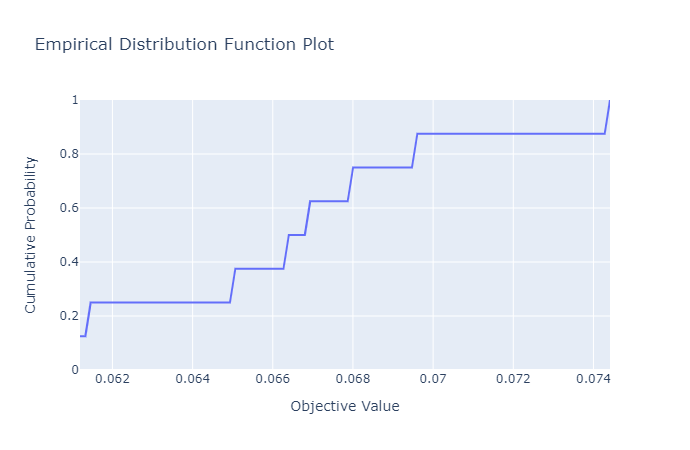

In [7]:
import optuna
optuna.visualization.plot_edf(ad.study)

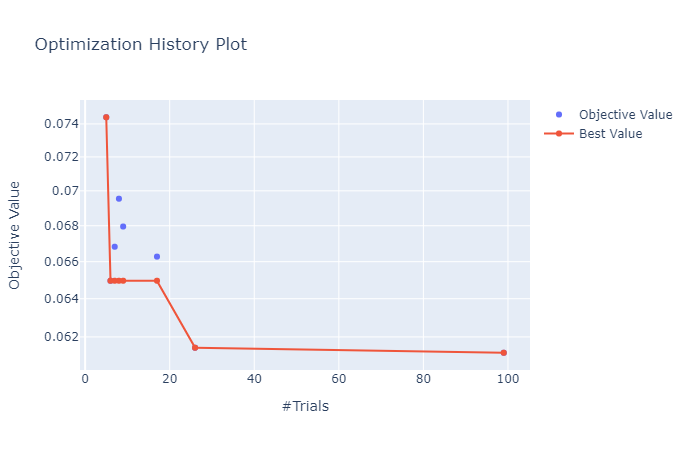

In [9]:
fig = optuna.visualization.plot_optimization_history(ad.study)
fig.update_yaxes(type='log')

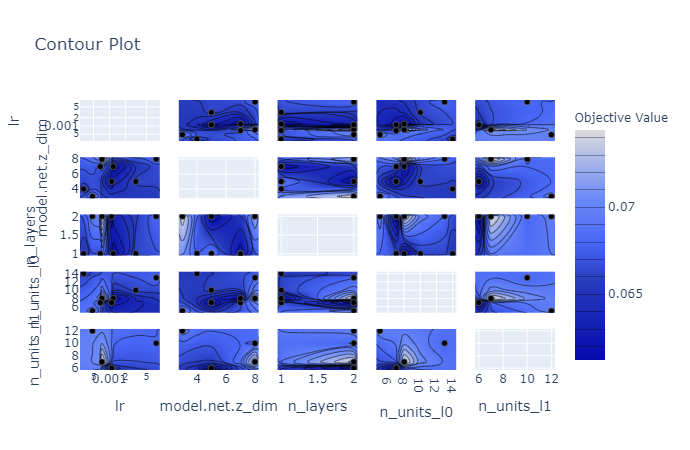

In [10]:
optuna.visualization.plot_contour(ad.study)

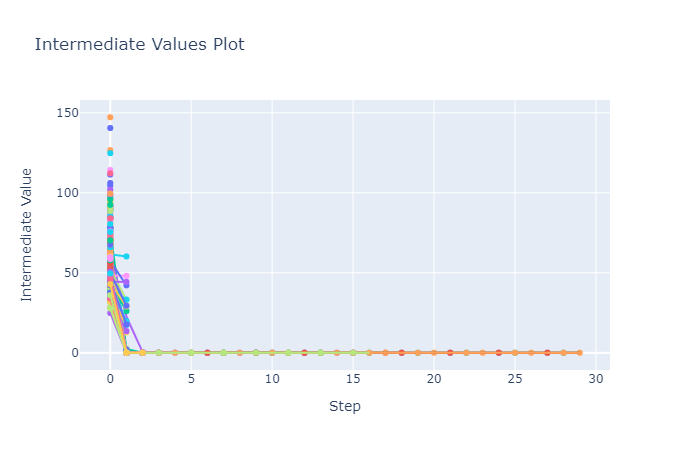

In [11]:
optuna.visualization.plot_intermediate_values(ad.study)

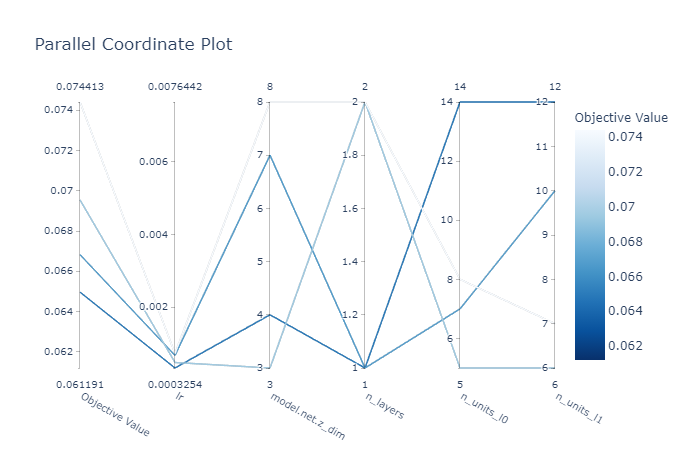

In [12]:
optuna.visualization.plot_parallel_coordinate(ad.study)

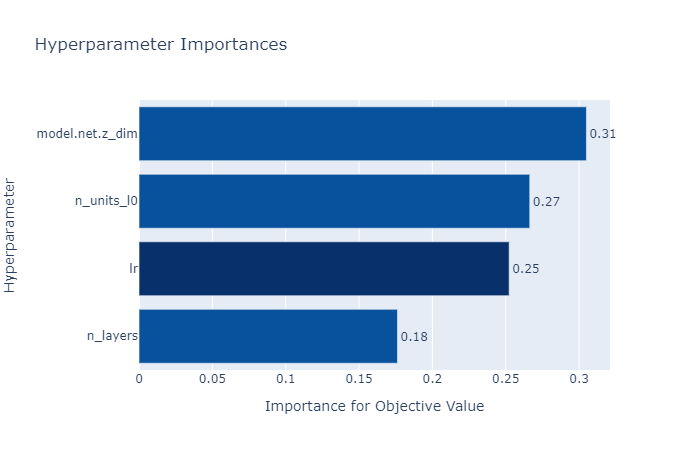

In [13]:
optuna.visualization.plot_param_importances(ad.study)

In [15]:
ad.trial.params

{'model.net.z_dim': 5,
 'n_layers': 2,
 'n_units_l0': 6,
 'n_units_l1': 6,
 'lr': 0.0013351824490296553}

'last.ckpt'を読み込むときには

# best param での実行

In [16]:
len(dm.val_dataloader())

18

In [5]:
len(dm.test_dataloader())

14917

In [9]:
ad.trainer.resume_from_checkpoint

'C:\\Users\\k_shinoda\\Program\\PyTorchLightning_Hydra_MLFlow_Optuna\\mlruns\\1\\e73318ace7a74682a7f10780a8100bdb\\artifacts\\models\\model-epoch=29.ckpt'

In [10]:
anomaly_scores = ad.get_anomaly_scores(dm=dm)

Testing: |                                                                                       | 0/? [00:00<…

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': tensor(0.0010), 'val_loss': tensor(0.0711)}
--------------------------------------------------------------------------------


In [11]:
len(anomaly_scores)

14980

In [11]:
import pandas as pd
df = pd.DataFrame(anomaly_scores)

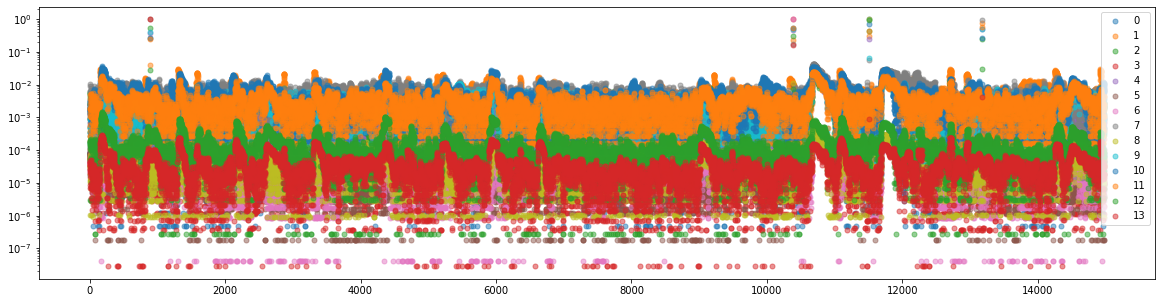

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
df.plot.line(ax=ax, style='o',ms=5, alpha=.5)
ax.semilogy()
#df.rolling(50, center=True).mean().plot.line(ax=ax, style='g--', alpha=.5)
#ax2 = ax.twinx()
#pd.read_csv('./data/dsc_2019/predict/data01_predict.csv').plot(ax=ax2,style='--', alpha=.3, label='observe')
#fig.savefig('tmp.svg')
plt.show()

In [13]:
from scipy.io import arff
import pandas as pd
label, _ = arff.loadarff('data/EEG/EEG Eye State.arff')
label = pd.DataFrame(label).values

In [14]:
label = label[:,[-1]]
label = label.astype(int)

In [22]:
len(label)

14980

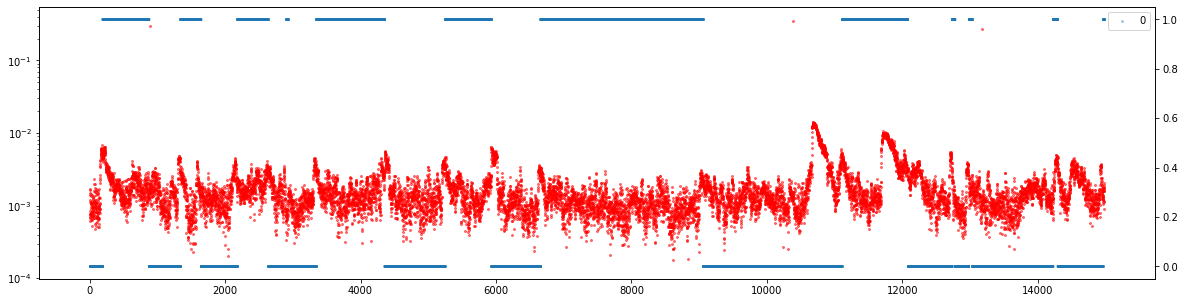

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
df.mean(axis=1).plot.line(ax=ax, style='ro',ms=2, alpha=.5)
#df.rolling(50, center=True).mean().plot.line(ax=ax, style='g--', alpha=.5)
ax.semilogy()
ax2 = ax.twinx()
pd.DataFrame(label).plot(ax=ax2, style='o', ms=2, alpha=.3, label='observe')
#fig.savefig('tmp.svg')
plt.show()